# Song Popularity Prediction 
## Data Exploratie notebook
Doel van dit notebook: Data exploratie, visualisatie en het handmatig testen van data preparatie stappen 
<br>
Gebruikte dataset: https://www.kaggle.com/datasets/yasserh/song-popularity-dataset

# Index
- 1. [Phase 1: Business Understanding](#1-business-understanding)
- 2. [Phase 2: Data Understanding](#data-understanding)
    - 2.1 [Basis analyse](#basis-anaylyse)
    - 2.2 [Visualisaties originele data](#visualisaties_origineel)
    - 2.3 [Nieuwe Features](#feature_engineering)
        - 2.3.1 [Visualisaties nieuwe features ](#visualisaties_nieuw)
        - 2.3.2 [Correlaties nieuwe features met song_popularity](#corr_nieuw)
    - 2.4 [Skewness](#skewness)
- 3. [Phase 3: Data Preparation](#data-prep)
    - 3.1 [Afwijkingen fase 2 onderzoeken en zo nodig oplossen](#afwijkingen_onderzoeken)
    - 3.2 [Keys feature cyclisch encoderen](#keys-feature)
    - 3.3 [Uitschieters detecteren en verwijderen](#uitschieters)
    - 3.4 [Transformaties](#transformaties)
        - 3.4.1 [Log Transformaties](#log)
        - 3.4.2 [Yeo-Johnson Transformaties](#yeo-joh)
    - 3.5 [Visualisaties Transformaties](#visualisaties_transformaties)

Ik heb in deze notebook de nieuwe features en bijbehorende visualisaties in phase 2 gezet, omdat ik eerst probeer te begrijpen welke nieuwe features ik kan maken en die eerst exploreren voordat ik ze toe voeg. 

<a id="business-understanding"></a>
# Phase 1: Business Understanding

Het doel van dit project is om te testen of populariteit van een nummer 
<br>
voorspelt kan worden met verschillende modellen o.b.v de audio-features 
<br>
in deze dataset. 

<a id="data-understanding"></a>
# Phase 2: Data Understanding

Alle afwijkingen uit deze fase worden verder onderzocht en zo nodig opgelost in de derde fase. 

In [1]:
# Modules importeren
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import (PowerTransformer,
                                   StandardScaler)

In [2]:
# csv importeren als pandas dataframe
df = pd.read_csv(
    "/Users/odessa/Desktop/Applied Data Science & AI/Data Science/Code Inleiding data science/song_data.csv"
)  # Dataset importeren

<a id="basis-anaylyse"></a>
## 2.1 Basis analyse

In [3]:
display(df.head())  # eerste 5 rijen van de dataset weergeven

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [4]:
df.shape  # rijen en kolommen tellen
print(f"De dataset bevat {df.shape[0]} rijen en {df.shape[1]} kolommen.")

De dataset bevat 18835 rijen en 15 kolommen.


In [5]:
df.info()  # data types en null waarden bekijken

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [6]:
df.describe().T  # statistiche informatie weergeven over numerieke kolommen

,count,mean,std,min,25%,50%,75%,max
song_popularity,18835.0,52.991877,21.905654,0.000000,40.0000,56.000000,69.00000,100.000
song_duration_ms,18835.0,218211.587576,59887.540566,12000.000000,184339.5000,211306.000000,242844.00000,1799346.000
acousticness,18835.0,0.258539,0.288719,0.000001,0.0241,0.132000,0.42400,0.996
danceability,18835.0,0.633348,0.156723,0.000000,0.5330,0.645000,0.74800,0.987
energy,18835.0,0.644995,0.214101,0.001070,0.5100,0.674000,0.81500,0.999
instrumentalness,18835.0,0.078008,0.221591,0.000000,0.0000,0.000011,0.00257,0.997
key,18835.0,5.289196,3.614595,0.000000,2.0000,5.000000,8.00000,11.000
liveness,18835.0,0.179650,0.143984,0.010900,0.0929,0.122000,0.22100,0.986
loudness,18835.0,-7.447435,3.827831,-38.768000,-9.0440,-6.555000,-4.90800,1.585
audio_mode,18835.0,0.628139,0.483314,0.000000,0.0000,1.000000,1.00000,1.000


In [7]:
# DataFrame met aantal en percentage dubbele waarden per kolom
dubbel = pd.DataFrame(
    {
        "Aantal dubbele waarden": [
            df[col].duplicated().sum() for col in df.columns
        ],  # aantal dubbele waarden per kolom
        "Percentage dubbele waarden (%)": [
            round(df[col].duplicated().mean() * 100, 2)
            for col in df.columns  # percentage dubbele waarden per kolom afgerond op 2 decimalen
        ],
    },
    index=df.columns,
)  # gebruik de kolomnamen als index
dubbel = dubbel.sort_values(
    by="Percentage dubbele waarden (%)", ascending=True
)  # sorteren op percentage dubbele waarden
print(dubbel)

                  Aantal dubbele waarden  Percentage dubbele waarden (%)
song_name                           5765                           30.61
tempo                               6723                           35.69
song_duration_ms                    7064                           37.50
loudness                           10419                           55.32
instrumentalness                   14910                           79.16
acousticness                       15626                           82.96
liveness                           17410                           92.43
audio_valence                      17589                           93.38
speechiness                        17611                           93.50
energy                             17703                           93.99
danceability                       17986                           95.49
song_popularity                    18734                           99.46
key                                18823           

### Observaties basis analyse 
Time_signature minimum = 0, kan niet volgens spotify API range: 3-7 (zie data dictionary)
<br>
Tempo minimum = 0, een track kan niet een tempo van 0 hebben. 
<br>
Deze punten worden aangepakt in fase 3 
<br>
Er zijn geen missende waardes. 
<br>
Alle features behalve song_name hebben numerieke waardes.
<br>
Er zijn veel dubbele waardes bij song_name. 
<br>
Dubbele waardes bij de numerieke features zijn logisch, omdat dat bereik vaak klein is. 

<a id="visualisaties_origineel"></a>
## 2.2 Visualisaties originele data

### Correlatie heatmap

0.00 – 0.30	nauwelijks of geen correlatie
<br>
0.30 – 0.50	lage of zwakke correlatie
<br>
0.50 – 0.70	middelmatige correlatie
<br>
0.70 – 0.90	hoge of sterke correlatie
<br>
0.90 – 1.00	zeer hoge of zeer sterke correlatie

In [8]:
df_num = df.select_dtypes(
    include=["number"]
).copy()  # Dataframe maken met alleen numerieke kolommen

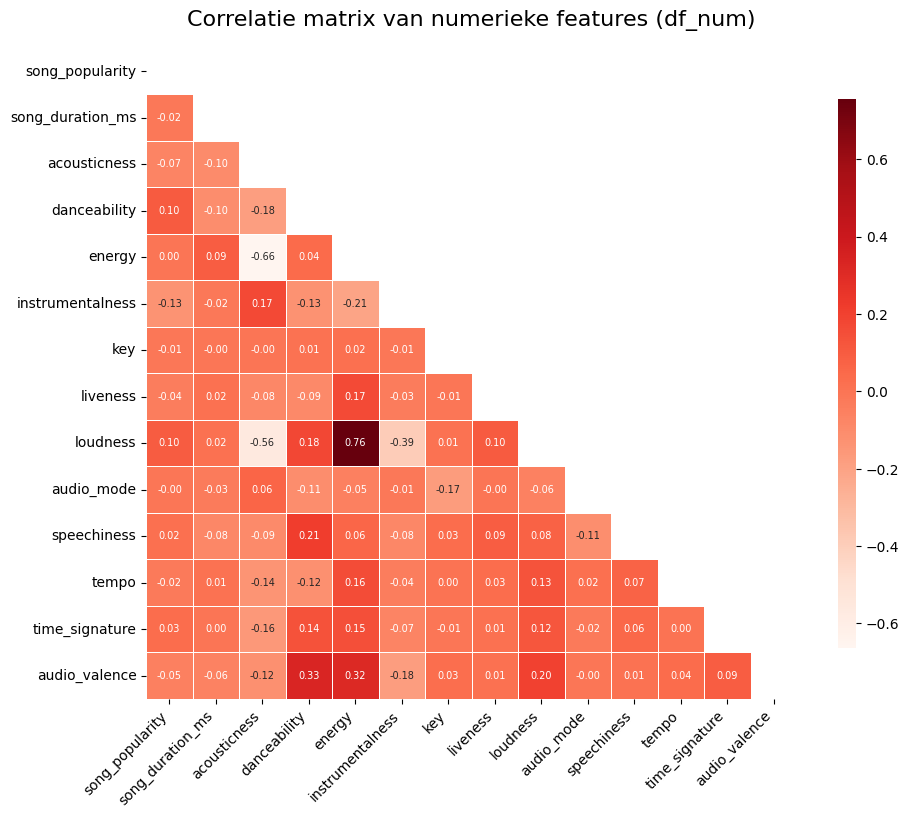

In [9]:
# Correlatie matrix voor df_num
corr = df_num.corr()

n = len(corr.columns)
scale = 0.7  # Grootte van de vakjes
size = min(14, n * scale)

f, ax = plt.subplots(figsize=(size, size))

# Masker om de bovenste driehoek te verbergen
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Tekstgrootte voor correlatie getallen
annot_size = max(6, 14 - n // 2)

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="Reds",
    linewidths=0.4,
    mask=mask,
    square=True,
    annot_kws={"size": annot_size},
    cbar_kws={"shrink": 0.6, "aspect": 30},  # colorbar smaller maken
)

plt.xticks(rotation=45, ha="right")  # x-as labels roteren
plt.yticks(rotation=0)  # y-as labels horizontaal
plt.title("Correlatie matrix van numerieke features (df_num)", fontsize=16, pad=16)
plt.tight_layout()
plt.show()

### Observatie correlaties 
De correlaties tussen song_popularity en de meeste features zijn erg zwak. Danceability en loudness hebben de hoogste correlatie (0.1), wat nog steeds erg zwak is maar het kan mogelijk zijn dat luidere en meer dansbare nummers mogelijk populairder zijn. 
<br>
Instrumentalness heeft een negatieve correlatie met song_popularity van -0.13. Deze waarde is ook heel zwak; maar er is een mogelijkheid dat instrumentale nummers iets minder goed scoren in populariteit. 
<br>
sterke correlatie tussen loudness en energy (0.76). Logisch want energieke nummers zijn vaak luider. 
<br>
<br>
Conclusie: Geen enkele feature heeft een correlatie > 0.5 met populariteit; lineaire verbanden zijn zwak. 
<br>
Hypothese: Omdat de lineaire relaties zo zwak zijn, zal een lineaire regressie waarschijnlijk niet accuraat de populariteit kunnen voorspellen. 
<br>
Zwakke correlatie zegt alleen iets over lineaire verbanden. Met Random Forest kunnen er mogelijk betere voorspellingen uitkomen 

### Histogrammen

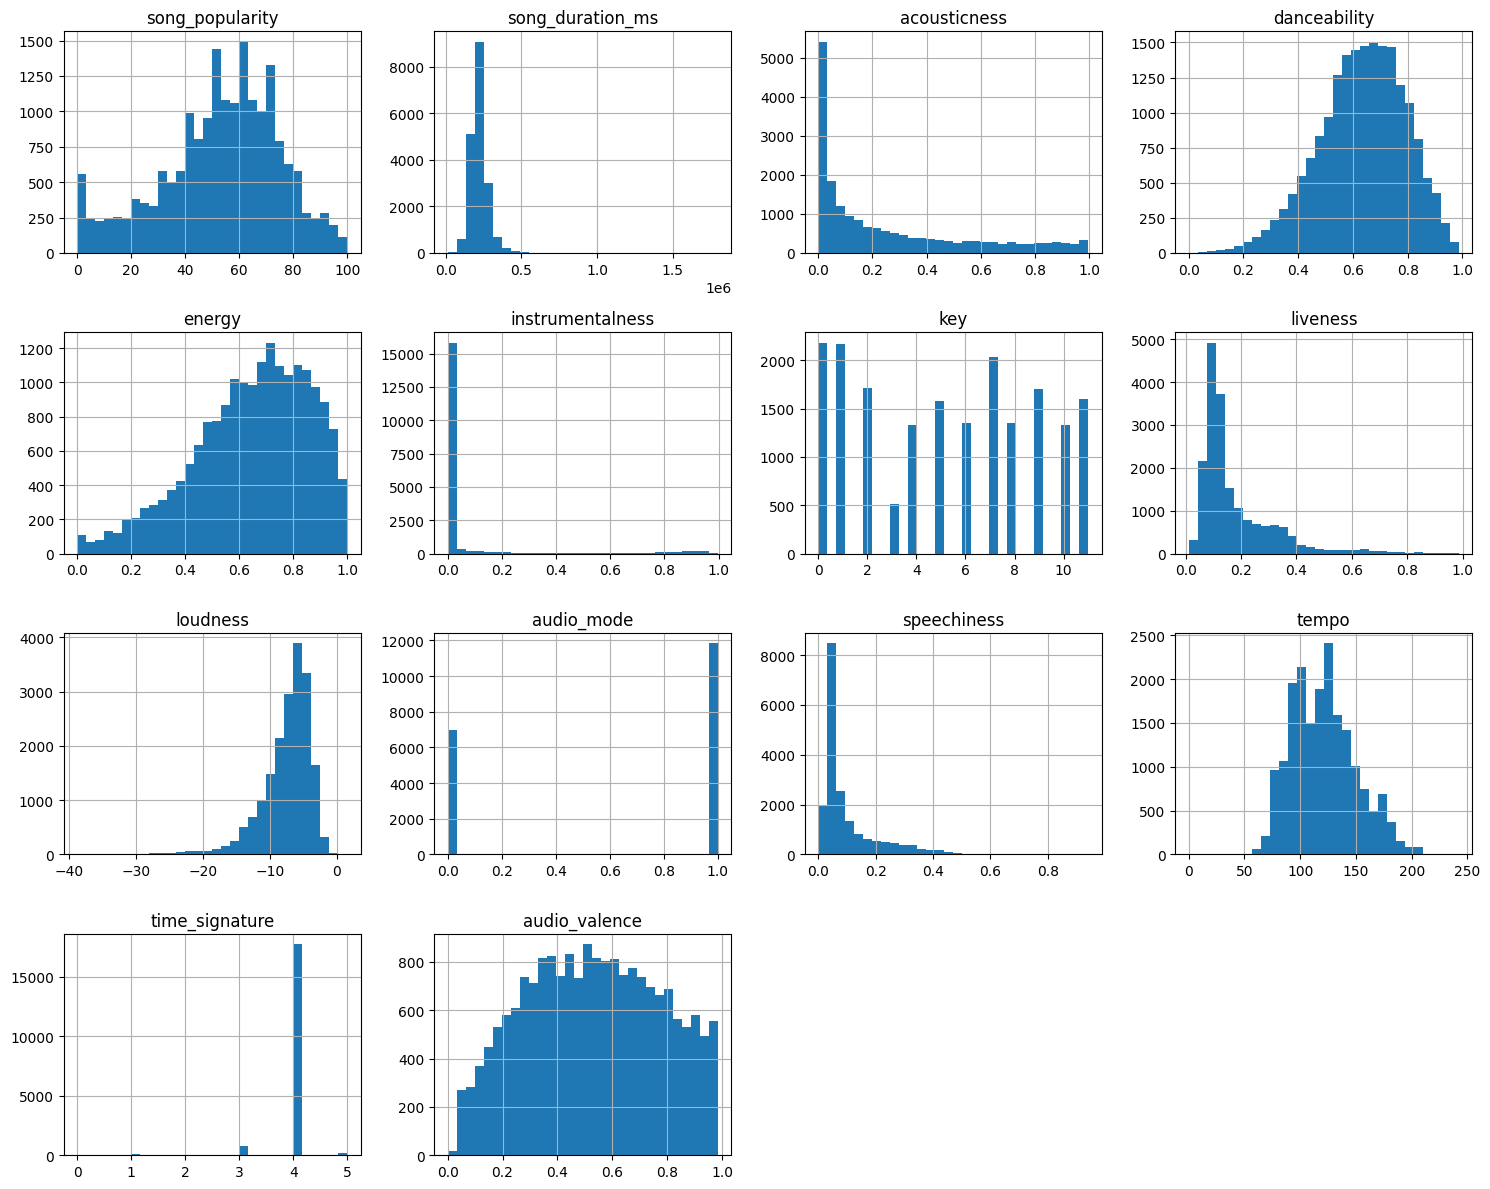

In [10]:
# Histogrammen van originele dataframe
df_num.hist(figsize=(15, 12), bins=30)
plt.title("Distributie van numerieke featrures")
plt.tight_layout()
plt.show()

### Observatie histogrammen
right skewed: song_duration_ms, acousticness, liveness, speechiness.
<br>
left skewed: danceability, tempo (wel bijna symmetrisch).
<br>
<br>
Veel features zijn hebben een scheve verdeling. Er worden later log en Yeo-Johnson transformaties toegepast op een aantal features om de verdelingen meer normaal te maken voor lineaire regressie.

### Scatter matrices

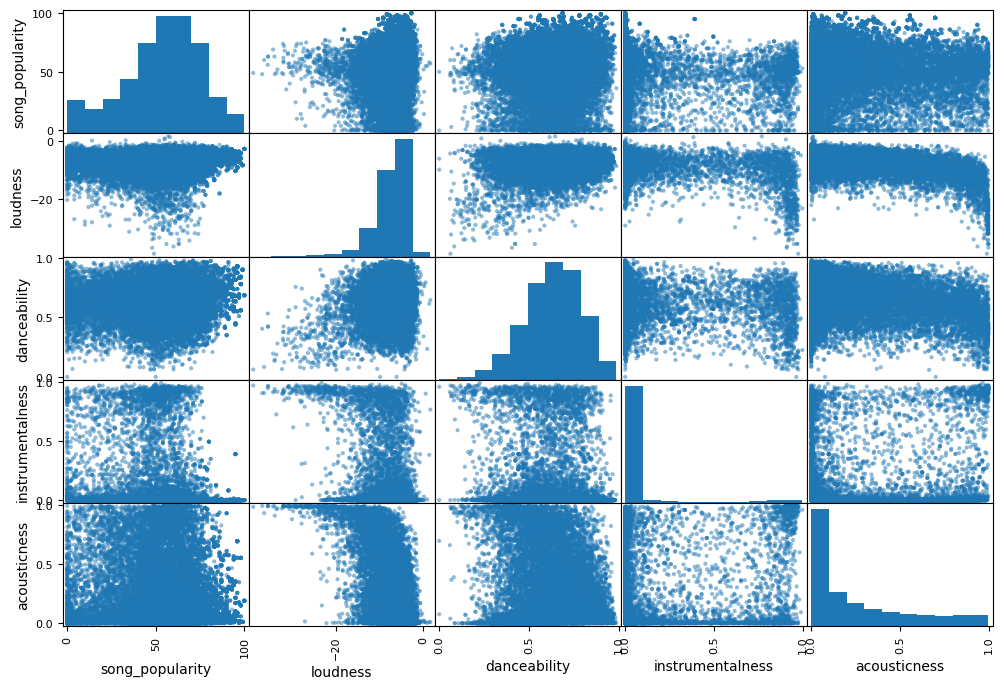

In [11]:
attributes = [
    "song_popularity",
    "loudness",
    "danceability",
    "instrumentalness",
    "acousticness",
]
scatter_matrix(df_num[attributes], figsize=(12, 8))
plt.savefig('scatter.png')
plt.show()

/var/folders/2w/_jnqv9dx72b6sk_y6t8rxlkr0000gn/T/ipykernel_36613/1800839452.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(


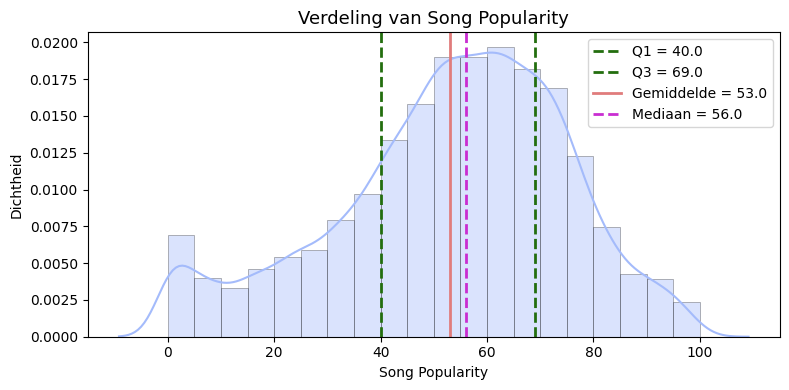

In [12]:
# q1, mediaan, q3 em gemiddelde berekenen
q1_popularity = df["song_popularity"].quantile(0.25)
median_popularity = df["song_popularity"].median()
q3_popularity = df["song_popularity"].quantile(0.75)
mean_popularity = df["song_popularity"].mean()

# Plot histogram + KDE
plt.figure(figsize=(8, 4))
sns_plot = sns.distplot(
    df["song_popularity"],
    color="#a4bbfb",
    hist_kws=dict(edgecolor="black", linewidth=0.5, color="#a4bbfb"),
    bins=20,
)

# Verticale lijnen
plt.axvline(
    q1_popularity,
    color="#236E0E",
    linestyle="--",
    linewidth=2,
    label=f"Q1 = {q1_popularity:.1f}",
)
plt.axvline(
    q3_popularity,
    color="#236E0E",
    linestyle="--",
    linewidth=2,
    label=f"Q3 = {q3_popularity:.1f}",
)
plt.axvline(
    mean_popularity,
    color="#e07c7c",
    linestyle="-",
    linewidth=2,
    label=f"Gemiddelde = {mean_popularity:.1f}",
)
plt.axvline(
    median_popularity,
    color="#C92DD1",
    linestyle="--",
    linewidth=2,
    label=f"Mediaan = {median_popularity :.1f}",
)

# Titel en labels
plt.title("Verdeling van Song Popularity", fontsize=13)
plt.xlabel("Song Popularity")
plt.ylabel("Dichtheid")
plt.legend()
plt.tight_layout()
plt.show()

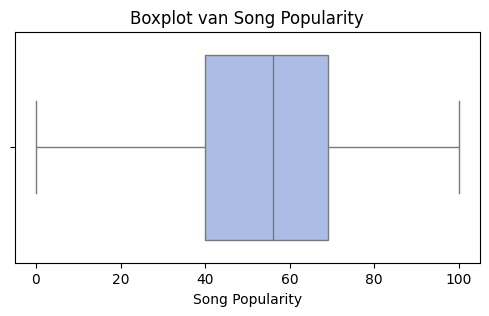

In [13]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=df["song_popularity"], color="#a3b7ef", fliersize=3)
plt.title("Boxplot van Song Popularity")
plt.xlabel("Song Popularity")
plt.show()

### Observatie populariteit distributie en boxplot
Song_popularity is bijna normaal verdeeld. De meeste nummers hebben een populariteitsscore tussen 40 en 70. Hierdoor kan het misschien wel moeilijker zijn voor het model om te leren van hele populaire nummers (80-100) en heel onpopulaire nummers (0-20). 

<a id="feature_engineering"></a>
## 2.3 Nieuwe Features

In [14]:
# Nieuwe features creëren

def nieuwe_features(df):
    df = df.copy()
    df["valence_dance"] = (
        df["audio_valence"] * df["danceability"]
    )  # Combinatie van valence en danceability voor een maat voor hoe opgewekt en dansbaar een nummer is. hoog = opgewekt en dansbaar, laag = somber en niet dansbaar.

    # Ratio features
    df["acoustic_dance_ratio"] = df["acousticness"] / (df["danceability"] + 0.001)
    df["duration_energy_ratio"] = df["song_duration_ms"] / (df["energy"] + 0.001)
    # Kleine constante (0.001) toegevoegd aan beide ratio delingen om deling door nul te vermijden als een waarde in een van de kolommen nul is

    return df

### Uitleg nieuwe features
valence_dance: Combinatie van valence en danceability voor een maat voor hoe opgewekt en dansbaar een nummer is. Hoge waarde = opgewekt en dansbaar, lage = somber en niet dansbaar.
<br>
<br>
acoustic_dance_ratio: Hoe akoustisch een nummer is in verhouding tot hoe dansbaar het is. Hoge waarde = erg akoustisch maar weinig dansbaar. Lage waarde =  weinig akoustisch maar erg dansbaar.
<br>
<br>
duration_energy_ratio: Hoe lang een nummer is in verhouding tot zijn energie. Hoge waarde = lang nummer met lage energie. Lage waarde = kort nummer met hoge energie.

<a id="visualisaties_nieuw"></a>
### 2.3.1 Visualisaties nieuwe features 

Nieuwe features toegevoegd:
 ['valence_dance', 'acoustic_dance_ratio', 'duration_energy_ratio']


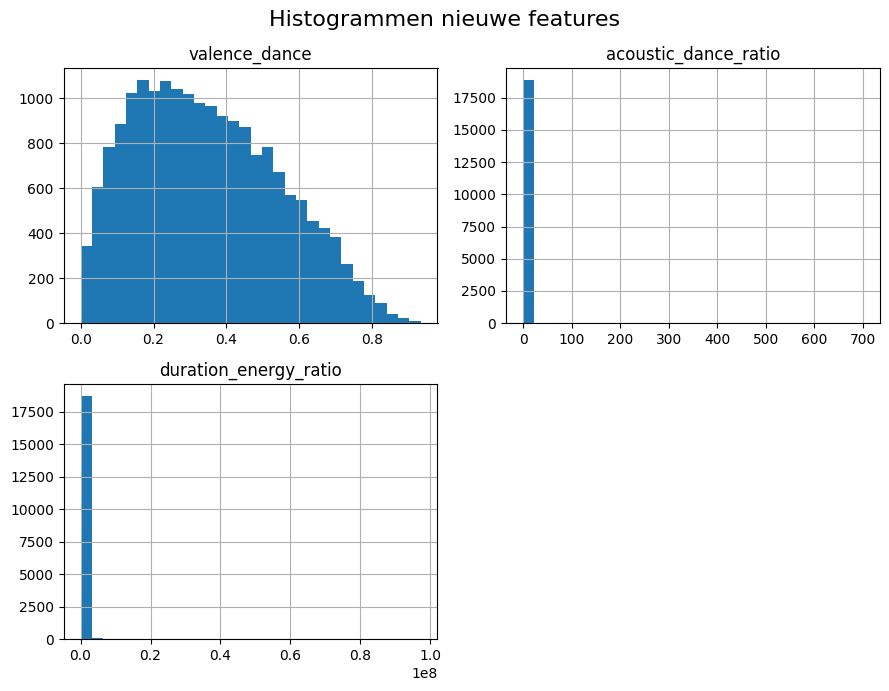

In [15]:
df_num_features = nieuwe_features(
    df_num.copy()
)  # Dataframe met nieuwe features aanmaken
new_cols = [
    c for c in df_num_features.columns if c not in df_num.columns
]  # Nieuwe kolomnamen identificeren
print("Nieuwe features toegevoegd:\n", new_cols)

# Dataframe voor exploratie met nieuwe features en target
df_explore = df_num_features.copy()
df_explore["song_popularity"] = df["song_popularity"]

# Histogrammen van nieuwe features
df_num_features[new_cols].hist(figsize=(9, 7), bins=30)
plt.suptitle("Histogrammen nieuwe features", fontsize=16)
plt.tight_layout()
plt.show()

### Observatie histogrammen nieuwe features
valence_dance is redelijk normaal verdeeld, wel beetje rechts-scheef. 
<br>
De laatste twee zijn sterk rechts-scheef verdeeld

<a id="corr_nieuw"></a>
### 2.3.2 Correlaties nieuwe features met song_popularity 

In [16]:
df_new_only = df_num_features[
    new_cols
].copy()  # Dataframe maken met alleen nieuwe features

# DataFrame aanmaken met nieuwe features + target
df_corr = df_new_only.copy()
df_corr["song_popularity"] = df["song_popularity"]

corr = df_corr.corr()  # correlatie berekenen

corr_with_target = (
    corr["song_popularity"].sort_values(ascending=False).round(3)
)  # correlatie tonen, afgerond op drie decimalen en gesorteerd
print(corr_with_target)

song_popularity          1.000
duration_energy_ratio   -0.001
valence_dance           -0.005
acoustic_dance_ratio    -0.026
Name: song_popularity, dtype: float64


### Observaties correlaties nieuwe features 
De nieuwe features hebben geen sterke correlatie met song_popularity. 

In [17]:
df_num = nieuwe_features(df_num)  # Nieuwe features toevoegen aan df_num

<a id="skewness"></a>
## 2.4 Skewness

https://www.datacamp.com/tutorial/understanding-skewness-and-kurtosis

In [18]:
# Functie Skewness berekenen en highlighten van hoog scheef, matig scheef en redelijk symmetrisch


def skewness(df):
    """Bereken skewness voor numerieke kolommen in de dataframe en highlight de resultaten."""

    skewness = df.skew()  # Skewness berekenen

    # DataFrame met alleen skewness waarden
    stats_skew = pd.DataFrame({"skewness": skewness})

    # Functie om skewness te highlighten
    def highlighter(rij):
        skew = rij["skewness"]
        color = ""

        if (
            abs(skew) > 1
        ):  # Hoge scheefheid (groter dan 1 of kleiner dan -1) kleur = rood
            color = "background-color: red; color: black;"
        elif (
            0.5 < abs(skew) <= 1
        ):  # Matige scheefheid (scheefheid tussen -1 en -0.5 of tussen 0.5 en 1) kleur = blauw
            color = "background-color: #336df5; color: black;"
        elif (
            abs(skew) <= 0.5
        ):  # Redelijk symmetrische distributie (scheefheid tussen -0.5 en 0.5) geen highlight
            color = ""
        return [color]

    styled = stats_skew.style.apply(highlighter, axis=1)  # highlighten
    display(styled)
    return stats_skew

### Skewness originele + nieuwe features

In [19]:
stats = skewness(df_num)
skewed_cols = stats.loc[stats["skewness"].abs() > 1].index.tolist()
print("Sterk scheve kolommen:", skewed_cols)

,skewness
song_popularity,-0.501487
song_duration_ms,3.257477
acousticness,1.071164
danceability,-0.391719
energy,-0.620738
instrumentalness,2.985176
key,-0.002520
liveness,2.215423
loudness,-1.929511
audio_mode,-0.530308


Sterk scheve kolommen: ['song_duration_ms', 'acousticness', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'time_signature', 'acoustic_dance_ratio', 'duration_energy_ratio']


### Observatie skewness originele en nieuwe features 
De skewness waardes bevestigen dat 'song_duration_ms', 'acousticness', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'time_signature', 'acoustic_dance_ratio', 'duration_energy_ratio' scheef verdeeld zijn.

<a id="data-prep"></a>
# Phase 3: Data Preparation

Afwijkingen uit fase 2 onderzoeken en data klaar maken voor training

<a id="afwijkingen_onderzoeken"></a>
## 3.1 Afwijkingen fase 2 onderzoeken en zo nodig oplossen 

#### Dubbele waardes

In [20]:
print(
    f"Totaal aantal waardes in de dataframe vóór het verwijderen van dubbele waardes uit song_name en song_duration_ms: {len(df)}"
)

# Dubbele waardes droppen van song_name en song_duration
# Als ik alleen song_name duplicates zou verwijderen, zou ik misschien covers van nummers verwijderen, dus daarom check ik ook de song_duration
df.drop_duplicates(subset=["song_name", "song_duration_ms"], inplace=True)
print(
    f"Totaal aantal waardes in de dataframe na verwijderen van dubbele waardes uit song_name en song_duration_ms: {len(df)}"
)

Totaal aantal waardes in de dataframe vóór het verwijderen van dubbele waardes uit song_name en song_duration_ms: 18835
Totaal aantal waardes in de dataframe na verwijderen van dubbele waardes uit song_name en song_duration_ms: 14468


In [21]:
df_num_cleaned = df.select_dtypes(include=["number"]).copy()

#### Time signature

In [22]:
df_num_cleaned["time_signature"].value_counts()

time_signature
4    13535
3      675
5      192
1       63
0        3
Name: count, dtype: int64

time_signature gaat van 3 tot 7 volgens de Spotify API. 
<br>
Waardes van 1 en 0 zijn foute waardes. 

In [23]:
# Indexen van time_signature == 0
time_sig_is_zero = df_num_cleaned[df_num_cleaned["time_signature"] == 0]

# Indexen van time_signature == 1
time_sig_is_one = df_num_cleaned[df_num_cleaned["time_signature"] == 1]

# Dataframe maken van time_signatures 0 en 1
df_time_signature_0_1 = pd.concat([time_sig_is_zero, time_sig_is_one])

# Statistische berekeningen zien van waardes met time signatures van 0 en 1
display(df_time_signature_0_1.describe())

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.00000,66.000000,66.000000,66.000000,66.000000
mean,45.606061,198070.166667,0.496574,0.473561,0.499382,0.248995,5.075758,0.182830,-9.905955,0.69697,0.137626,101.294924,0.954545,0.344342
std,19.970654,62598.633341,0.348572,0.183958,0.249554,0.378419,3.574743,0.150138,5.165663,0.46309,0.152235,36.120564,0.209895,0.235870
min,0.000000,12000.000000,0.000001,0.000000,0.003790,0.000000,0.000000,0.064000,-29.298000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,36.750000,171092.250000,0.155750,0.356250,0.304500,0.000000,2.000000,0.100425,-11.767750,0.00000,0.033700,79.101750,1.000000,0.158250
50%,50.000000,188785.000000,0.504000,0.505500,0.493000,0.001480,5.000000,0.123000,-9.009500,1.00000,0.053200,94.063000,1.000000,0.309000
75%,60.000000,224910.250000,0.807750,0.603750,0.677250,0.655500,8.000000,0.217000,-6.488500,1.00000,0.201000,117.001000,1.000000,0.498750
max,79.000000,435040.000000,0.991000,0.833000,0.992000,0.963000,11.000000,0.944000,-3.127000,1.00000,0.663000,200.729000,1.000000,0.908000


Omdat meerdere waardes afwijken: tempo, audio_valence, time_signature, speechiness, instrumentalness, danceability en song_popularity hebben allemaal een minimum van 0.0.
<br>
Bij sommige features zou een minimum van 0.0 theoretisch kunnen, maar de kans dat tempo een 0.0 minimum heeft kan bijvoorbeeld eigenlijk niet, want een liedje kan niet geen tempo hebben. 
<br>
Omdat er in totaal maar 66 rijen zijn met een time_signature van 1 of 0, heb ik ervoor gekozen om deze rijen allemaal te droppen. 

In [24]:
df = df[df["time_signature"] > 1]
df_num = df_num[df_num["time_signature"] > 1]
df_num_cleaned = df_num_cleaned[df_num_cleaned["time_signature"] > 1]

#### Tempo 

In [25]:
# Nummers met een tempo van 0.
nul_tempo = df_num_cleaned.loc[
    df_num_cleaned["tempo"] == 0, ["tempo", "song_popularity"]
]
print(f"Nummers met een tempo van 0: {nul_tempo}")

# Tempo == 0 is opgelost na verwijderen van dubbele waardes en time_signature 0 en 1

Nummers met een tempo van 0: Empty DataFrame
Columns: [tempo, song_popularity]
Index: []


In [26]:
# Bekijken of er nog duplicates zijn
df_num_cleaned.duplicated(subset=None).sum()

np.int64(2)

In [27]:
# Laatste twee duplicates verwijderen
df_num_cleaned = df_num_cleaned.drop_duplicates(keep="first")

In [28]:
# Nieuwe features toevoegen na cleaning (eerder werden de nieuwe features toegevoegd
# aan df_num (num copy van df). df_num_cleaned is een numerieke copy van df
# die opgeschoond is, maar hier moeten de nieuwe features weer aan toegevoegd worden)
df_num_cleaned = nieuwe_features(df_num_cleaned)
print(
    "Nieuwe features toegevoegd aan df_num_cleaned:",
    [c for c in df_num_cleaned.columns if c not in df.columns],
)

Nieuwe features toegevoegd aan df_num_cleaned: ['valence_dance', 'acoustic_dance_ratio', 'duration_energy_ratio']


<a id="keys-feature"></a>
## 3.2 Keys feature cyclisch encoderen

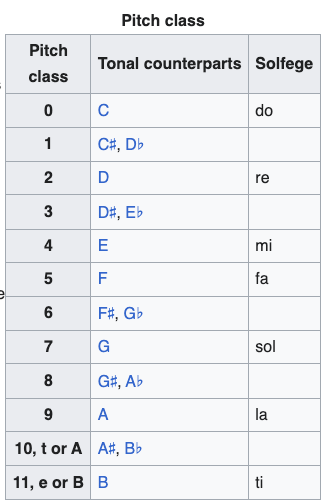

Dit is circulair: 12 en 0 zijn dezelfde toonsoort. 

Dit moet cyclisch gecodeerd worden, zodat het model begrijpt dat 0 (C) en 11 (B) ondanks dat ze numeriek ver uit elkaar liggen, muzikaal recht naast elkaar liggen. 

https://towardsdatascience.com/cyclical-encoding-an-alternative-to-one-hot-encoding-for-time-series-features-4db46248ebba/

https://medium.com/@axelazara6/why-we-need-encoding-cyclical-features-79ecc3531232

### Plotten van key eerste 60 data vóór cyclisch encoden (let op de schaal)

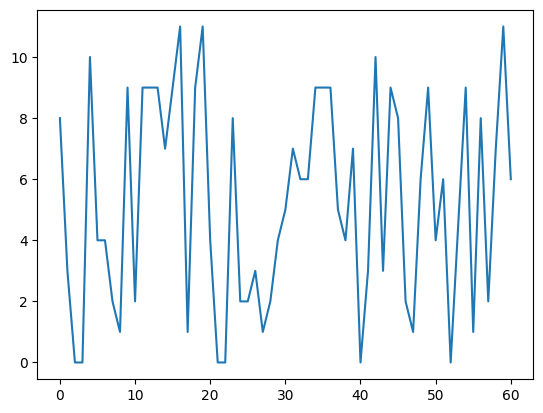

In [29]:
sample = df_num_cleaned[:60]
ax = sample["key"].plot()

### Cyclisch encoden 

#### The Cyclical Formula

$$
x = \sin\left(\frac{a \times 2\pi}{\max(a)}\right)
$$

$$
y = \cos\left(\frac{a \times 2\pi}{\max(a)}\right)
$$

Where a*2π represents the original cyclical feature, and max(a) is the maximum value of the cyclical feature.
<br>
https://www.thedataschool.com.au/ryan-edwards/feature-engineering-cyclical-variables/

In [30]:
df_num_cleaned["key_sin"] = np.sin(2 * np.pi * df_num_cleaned["key"] / 12)
df_num_cleaned["key_cos"] = np.cos(2 * np.pi * df_num_cleaned["key"] / 12)

### Plotten van key eerste 60 data ná cyclisch encoden (schaal is veranderd naar -1.00 tot + 1.00)

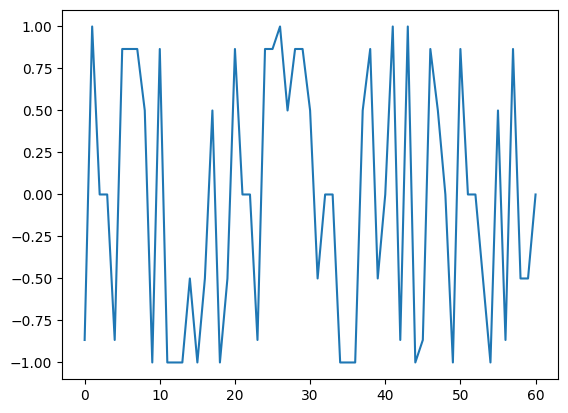

In [31]:
sample = df_num_cleaned[:60]
ax = sample["key_sin"].plot()

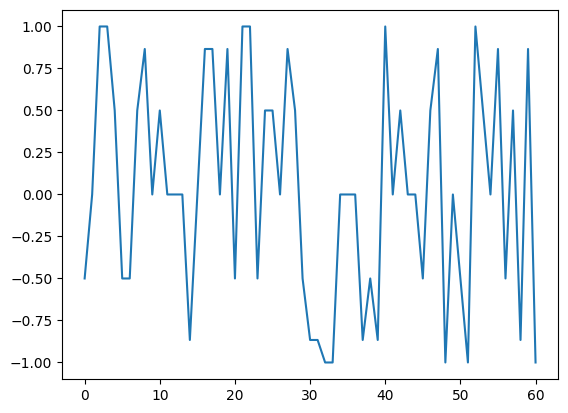

In [32]:
sample = df_num_cleaned[:60]
ax = sample["key_cos"].plot()

### Visualisatie twee dimensioneel perspectief van key 

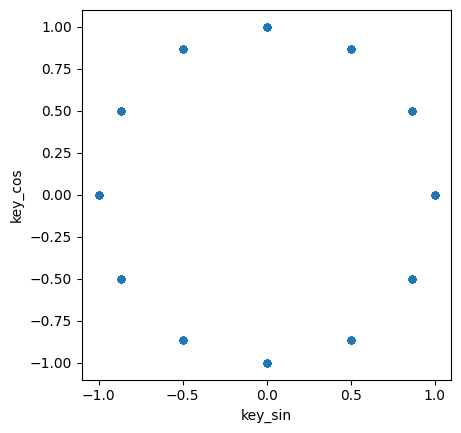

In [33]:
ax = df_num_cleaned.plot.scatter("key_sin", "key_cos").set_aspect("equal")

### Uitleg

De kolom `key` wordt omgezet naar twee nieuwe kolommen (`key_sin` en `key_cos`) 
die de positie op een cirkel weergeven:

| key | key_sin | key_cos | positie op de cirkel |
|-----|----------|----------|----------------------|
| 0   |  0.00    |  1.00    | bovenaan (12 uur)    |
| 3   |  1.00    |  0.00    | rechts (3 uur)       |
| 6   |  0.00    | -1.00    | onderaan (6 uur)     |
| 9   | -1.00    |  0.00    | links (9 uur)        |
| 11  | -0.50    |  0.87    | bijna bovenaan (11 uur) |

<a id="transformaties"></a>
## 3.4 Transformaties

Instrumentalness, speechiness en liveness hebben een sterk rechts-scheve verdeling.
<br>
Dat is logisch: de meeste nummers in deze dataset bevatten zang, weinig gesproken woorden en zijn niet live opgenomen, waardoor waarden laag blijven en de verdelingen rechts-scheef zijn. Ook zijn het discrete waardes van 0-1 waardoor ze niet geschikt zijn voor transformaties. 
<br>

Ik ga alleen features transformeren heel scheef zijn of een grote spreidingsbreedte hebben. 
- Log(1+x) voor sterk scheve, positieve variabelen(song_duration_ms)
- Yeo-Johnson voor features met negatieve waardes, links-scheve verdelingen of ratio variabelen: energy, loudness, acoustic_dance_ratio, duration_energy_ratio

In [37]:
# Kolommen definieren
yeo_cols = ["energy", "loudness", "acoustic_dance_ratio", "duration_energy_ratio"]
log_cols = ["song_duration_ms"]

<a id="log"></a>
### 3.4.1 Log Transformaties 

In [38]:
# Datagframe maken met de log cols
df_log = df_num_cleaned[log_cols].copy()

# Log-transformatie (log1p = log(1 + x) om problemen met nullen te voorkomen)
df_log_transformed = np.log1p(df_log)

# Standardiseren (z-score en gemiddelde = 0, standaarddeviatie = 1)
scaler = StandardScaler()
scaled_data_log = scaler.fit_transform(df_log_transformed)

# Nieuwe DataFrame maken met getransformeerde en geschaalde waarden
scaled_df_log = pd.DataFrame(scaled_data_log, columns=log_cols, index=df_log.index)

# Log-getransformeerde en geschaalde waarden terug in de originele dataframe plaatsen
df_num_cleaned[log_cols] = scaled_df_log

<a id="yeo-joh"></a>
### 3.4.2 Yeo-Johnson Transformaties

In [39]:
# Dataframe maken met de yeo cols
df_yeo = df_num_cleaned[yeo_cols]

# Yeo-Johnson transformatie toepassen
pt = PowerTransformer(method="yeo-johnson")
transformed_data_yeo = pt.fit_transform(df_yeo)
transformed_df_yeo = pd.DataFrame(
    transformed_data_yeo, columns=df_yeo.columns, index=df_yeo.index
)

# Standardiseren (z-score en gemiddelde = 0, standaarddeviatie = 1)
scaler = StandardScaler()
scaled_data_yeo = scaler.fit_transform(transformed_df_yeo)
scaled_df_yeo = pd.DataFrame(
    scaled_data_yeo, columns=transformed_df_yeo.columns, index=transformed_df_yeo.index
)

<a id="visualisaties_transformaties"></a>
## 3.5 Visualisaties Transformaties 

In [40]:
# Skewness en kurtosis van df_num_cleaned yeo cols vóór Power transformatie
org_cols = ["energy", "loudness", "acoustic_dance_ratio", "duration_energy_ratio"]
stats_origineel = skewness(df_num_cleaned[org_cols])
skewed_cols = stats_origineel.loc[stats_origineel["skewness"].abs() > 1].index.tolist()
print("Sterk scheve kolommen vóór Yeo-Johnson:", skewed_cols)

,skewness
energy,-0.599553
loudness,-1.867424
acoustic_dance_ratio,5.042518
duration_energy_ratio,22.538878


Sterk scheve kolommen vóór Yeo-Johnson: ['loudness', 'acoustic_dance_ratio', 'duration_energy_ratio']


In [41]:
# Skewness en kurtosis van df na yeo johnson transformatie
stats_transformed = skewness(transformed_df_yeo)
skewed_cols_after = stats_transformed.loc[
    stats_transformed["skewness"].abs() > 1
].index.tolist()
print("Sterk scheve kolommen ná Yeo-Johnson:", skewed_cols_after)

,skewness
energy,-0.121951
loudness,0.006735
acoustic_dance_ratio,0.344141
duration_energy_ratio,-0.124392


Sterk scheve kolommen ná Yeo-Johnson: []


De kolommen zijn niet meer scheef na yeo-johnson transformatie

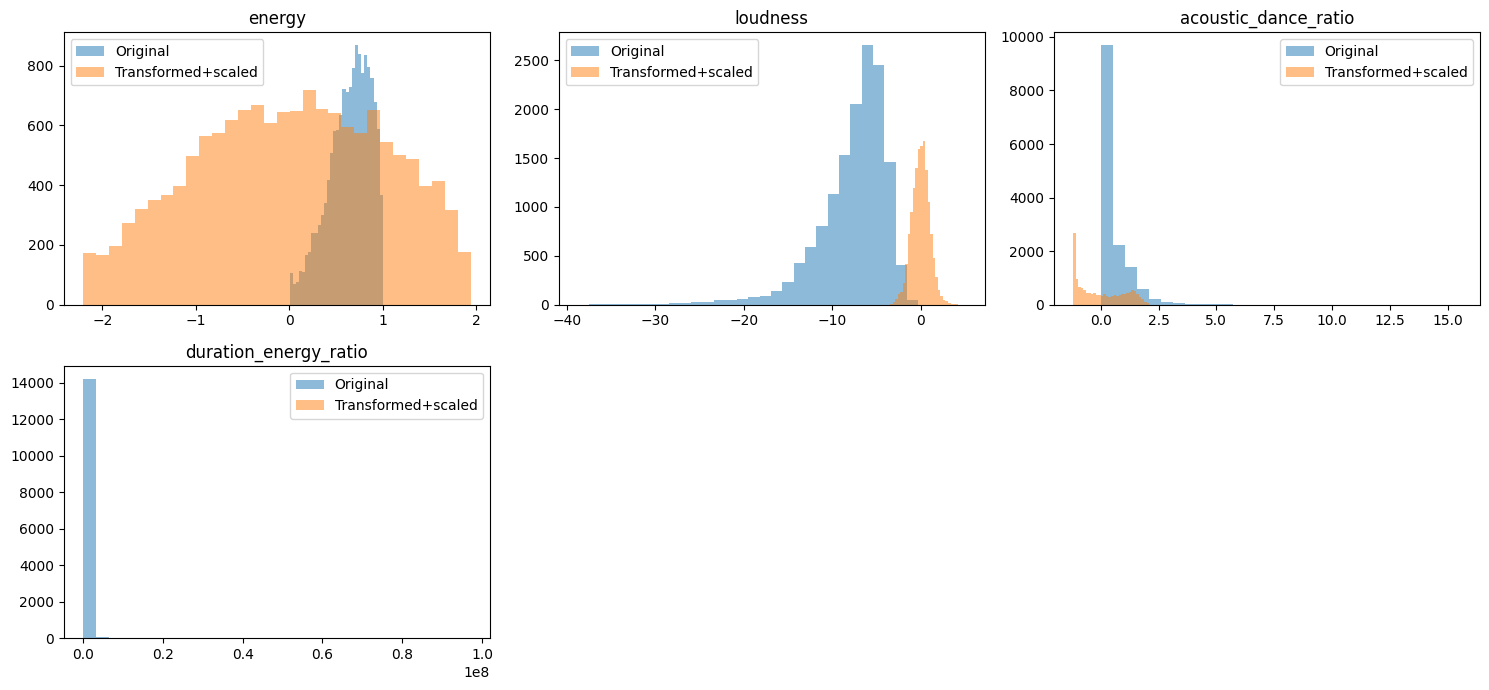

In [42]:
# Getransformeerde + geschaalde kolommen
cols = df_yeo.columns
n_cols = 3  # hoeveel plots per rij
n_rows = int(np.ceil(len(cols) / n_cols))  # bepaalt aantal nodige rijen

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 7))  # aanmaken subplots
axes = np.atleast_2d(axes)  # zorgt dat axes altijd 2d is, ook bij 1 rij

# Over elke kolom itereren en histogrammen plotten
for i, col in enumerate(cols):
    r, c = divmod(i, n_cols)
    ax = axes[r, c]

    # Plot originele histogrammen
    ax.hist(df_num_cleaned[col], bins=30, alpha=0.5, label="Original")
    # Plot getransformeerde histogrammen
    ax.hist(scaled_df_yeo[col], bins=30, alpha=0.5, label="Transformed+scaled")

    ax.set_title(col)  # titel
    ax.legend()  # legenda

# Verberg overige lege subplots
for j in range(i + 1, n_rows * n_cols):
    r, c = divmod(j, n_cols)
    axes[r, c].axis("off")

plt.tight_layout()  # plots niet laten overlappen
plt.show()

dancability, energy, audio valence en loudness worden beter van yeo johnson transformatie, de rest niet. 

In [43]:
# Combineer log-transformaties + geschaalde Yeo-Johnson features
df_final = df_num_cleaned.copy()
df_final[yeo_cols] = scaled_df_yeo[yeo_cols]

In [44]:
stats = skewness(df_final)
skewed_cols = stats.loc[stats["skewness"].abs() > 1].index.tolist()
print("Sterk scheve kolommen:", skewed_cols)

,skewness
song_popularity,-0.569264
song_duration_ms,-0.227103
acousticness,0.982470
danceability,-0.388886
energy,-0.121951
instrumentalness,2.644547
key,-0.012326
liveness,2.213810
loudness,0.006735
audio_mode,-0.544119


Sterk scheve kolommen: ['instrumentalness', 'liveness', 'speechiness', 'time_signature']


### Observatie Transformaties 
De log en Yeo-Johnson transformaties hebben de sterk scheve verdelingen duidelijk verbeterd. De features zijn nu symmetrischer en beter geschaald, wat beter is voor lineaire modellen. 

Instrumentalness, speechiness en liveness zijn bewust niet getransformeerd, omdat hun scheefheid betekenisvol is.
